### Project Website: https://mohamedirfansh.github.io/Airbnb-Data-Science-Project/

## Sub-Problem 3: Does textual data in the summary and sentiments of reviews affect price?

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Importing the listing dataset
listingsDF = pd.read_csv('datasets/listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### Data Cleaning

In [3]:
# Certain textual variables were extracted into a dataframe
listingDF = listingsDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]
listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [4]:
# Replace NaN values with 0
listingDF.fillna(0, inplace=True)

# Extract prices from listingDF into priceDF
priceDF = listingDF['price']
# Create an empty prices list
prices=[]

# Convert prices from listingDF into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
# Replace the price column in the original listingDF with the new prices
listingDF['price'] = prices

# Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.bathrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,0,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


### Analyzing the summaries of the most expensive listings

In [5]:
# Creating a dataframe of the summaries of the 100 most expensive listings
summaryDF = listingDF[['summary','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,price
3122,2 bedroom fully finished basement apartment wi...,1000.0
1208,100% Walk Score close to the Convention Center...,999.0
2,New modern house built in 2013. Spectacular s...,975.0
3443,Beautiful home that is located quiet neighborh...,950.0
1279,Fully updated by professional interior designe...,899.0


In [6]:
from nltk.corpus import stopwords
import string
import nltk

# Some data cleaning

words=''
for index,row in top100DF.iterrows():
    words += row['summary']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'bedroom fully finished basement apartment separate'

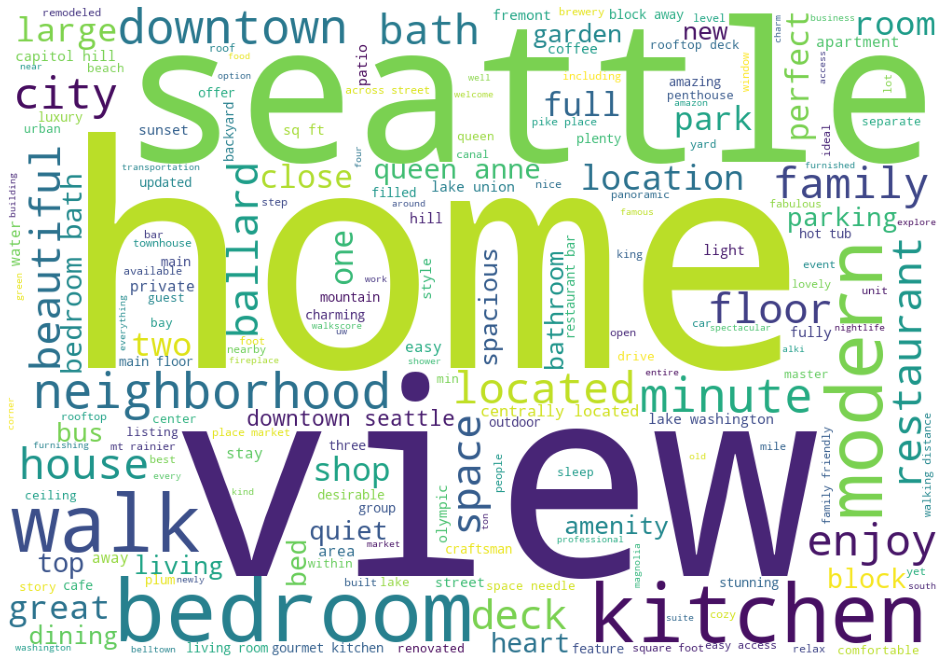

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud above, we can see that summaries of the most expensive listings all have particularly 3 words in common: 'seattle', 'home' & 'view'. Other words like: 'kitchen', 'bedroom', 'walk', 'modern' also commonly appear in those listings. But could it just be that all listings have these words in their summaries? To find out, lets also analyze the summaries of the cheapest listings and see if we can infer anything from that.

In [13]:
# Creating a dataframe of the summaries of the 100 most cheapest listings
summaryLowDF = listingDF[['summary','price']]
summaryLowDF = summaryLowDF[pd.notnull(summaryLowDF['summary'])]
summaryLowDF = summaryLowDF[summaryLowDF['summary']!=0]
summarLowyDF = summaryLowDF.sort_values('price',ascending=[1])
bot100DF = summaryLowDF.head(100)
bot100DF.sample(n=5)

,summary,price
135,This cozy one-bedroom flat is one unit of a ne...,99.0
31,"Charming, clean, picturesque home in perfect l...",325.0
73,"Cozy, old world charm cottage in iconic Ballar...",145.0
52,This charming top floor apartment is part of a...,137.0
67,A beautiful sun-filled homes in an amazing Bal...,465.0


In [14]:
# Some data cleaning

words=''
for index,row in bot100DF.iterrows():
    words += row['summary']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

"chemically sensitive 've removed irritant triggeri"

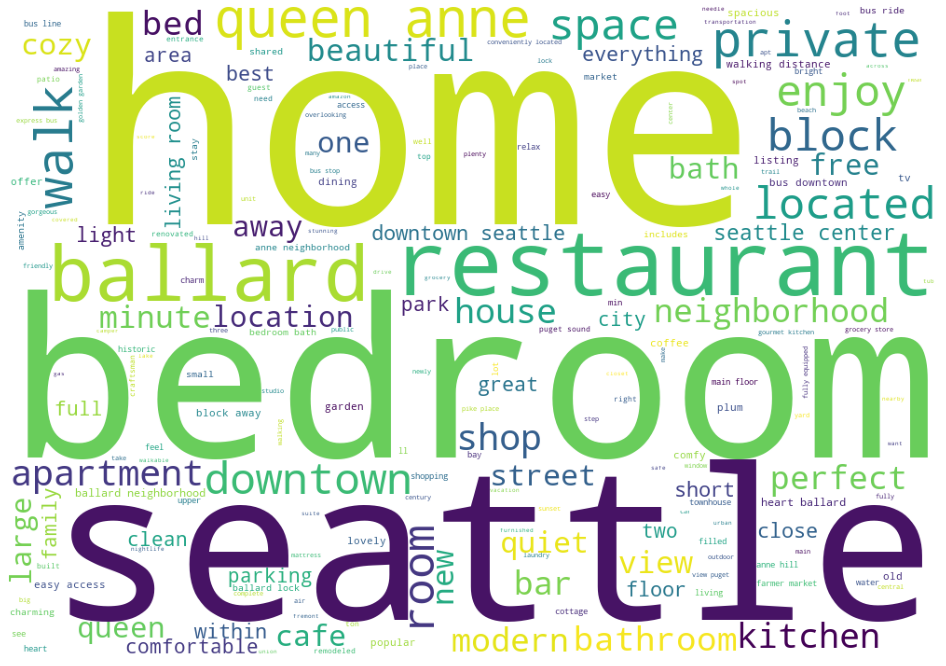

In [15]:
wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Here we have seen the most common words in the summary of the cheapest listings. As it can be seen from the wordcloud, indeed there are overlapping words with the most expensive listings. Words like: 'seattle', 'bedroom', 'home' appear frequently in both. So they do not tell us anything special. However, words like: 'view', 'modern' & 'walk' appear more frequently in expensive listings as opposed to cheaper listings. So it turns out that indeed there are certain words which appear more frequently among expensive listings.

### Analyzing if review sentiment has any relation with price?

In [17]:
reviewsDF = pd.read_csv("datasets/reviews.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


###### We will use the built-in analyzer in the NLTK Python library to assign a polarity score to each comment to retrieve the 'sentiment' of comments - 'positive','negative' or 'neutral'

In [20]:
# Assigning polarity score to each comment and adding it to a dataframe

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value']="Default"
reviewsDF['neg']=0.0
reviewsDF['pos']=0.0
reviewsDF['neu']=0.0
reviewsDF['compound']=0.0
for index,row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.set_value(index,'polarity_value',ss)
    reviewsDF.set_value(index,'neg',ss['neg'])
    reviewsDF.set_value(index,'pos',ss['pos'])
    reviewsDF.set_value(index,'neu',ss['neu'])
    reviewsDF.set_value(index,'compound',ss['compound'])

reviewsDF.head()

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed i

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.000,0.538,0.462,0.7901
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.000,0.391,0.609,0.9872
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...","{'neg': 0.043, 'neu': 0.772, 'pos': 0.185, 'co...",0.043,0.185,0.772,0.8718
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,"{'neg': 0.035, 'neu': 0.765, 'pos': 0.2, 'comp...",0.035,0.200,0.765,0.8313
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp...",0.000,0.345,0.655,0.9783


In [21]:
reviewsDF.to_csv('polarity_reviews.csv')

The polarity scores of each review for each listing is exported to the polarity_reviews.csv file. You can view the attached polarity_reviews.csv file.

In [23]:
# Removing comments which are not in English

from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in reviewsDF.iterrows():
    lang=detect_lang(row['comments'])
    reviewsDF.set_value(index,'language',lang)

EngReviewsDF=reviewsDF[reviewsDF.language=='en']

EngReviewsDF.head(2)

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,"{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'comp...",0.0,0.538,0.462,0.7901,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,"{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'comp...",0.0,0.391,0.609,0.9872,en


##### Number of comments with positive sentiment

In [24]:
polarDF=EngReviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDF.set_value(i,'Sentiment','positive')
del polarDF['range_i']
polarDF.head()

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,count_of_Comments,RANGE,Sentiment
0,1649,0.0,positive
1,14115,0.1,positive
2,29157,0.2,positive
3,22301,0.3,positive
4,9886,0.4,positive


##### Number of comments with negative sentiment

In [28]:
polarDFneg=EngReviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFneg.set_value(i,'Sentiment','negative')
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,count_of_Comments,RANGE,Sentiment
0,24927,0.0,negative
1,1161,0.1,negative
2,84,0.2,negative
3,22,0.3,negative
4,3,0.4,negative


##### Number of comments with neutral sentiment

In [29]:
polarDFnut=EngReviewsDF[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.set_value(i,'RANGE',float(str(r['range_i'])[1:4].replace(',',''))) 
    polarDFnut.set_value(i,'Sentiment','neutrl')
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head()

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,count_of_Comments,RANGE,Sentiment
0,7,0.0,neutrl
1,156,0.1,neutrl
2,568,0.2,neutrl
3,1346,0.3,neutrl
4,3861,0.4,neutrl


D:\ProgramFiles\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

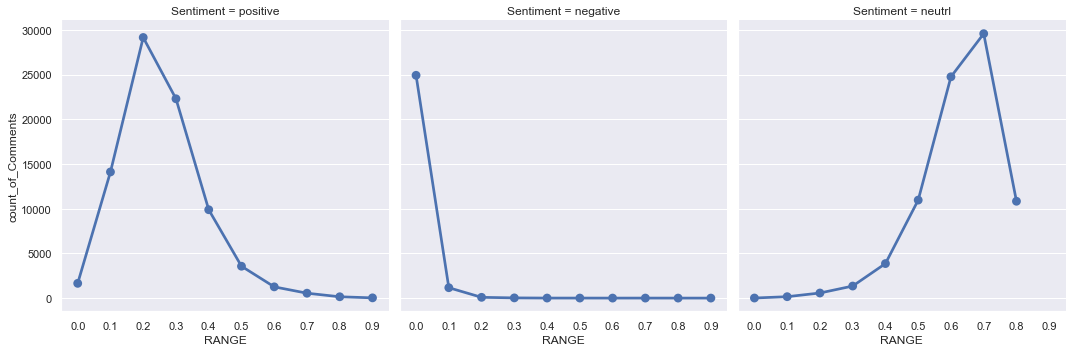

In [31]:
# Visualizing the sentiment counts

plt.figure(figsize=(10,10))
sb.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment")

From the graphs above, we can conlcude 3 things. First is that **most reviews do not have much negativity. Only a few reviews have a modicum of negativity**. Infact, most of the reviews have no negativity classified in the 0.0 negative sentiment. Second thing we can see is that there are **a lot of reviews with a reasonable amount of positivity**. However, the final thing we can conclude is that **most of the reviews have much neutrality**. **If most of the reviews have a lot of neutrality, we cannot infer much on positivity/negativity of comments with respect to price since the bulk of reviews all fall in the neutral category**. So we can conclude that most reviews are written with a neutral sentiment although there is a very slight tilt to positive sentiments.

### Analyzing if number of reviews a listing affects its price.

Text(0, 0.5, 'Number of reviews')

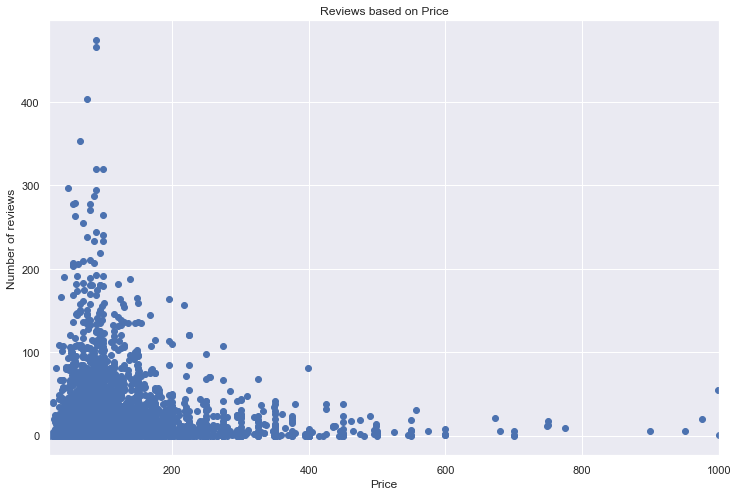

In [37]:
inputDF = pd.read_csv('datasets/listings.csv')
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("Price")
plt.ylabel("Number of reviews")

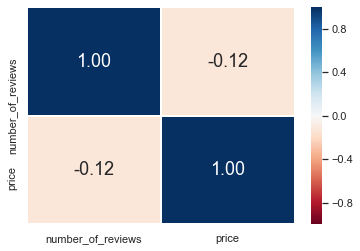

In [38]:
sb.heatmap(price_review.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From the above correlation matrix, we can clearly see that number of reviews and the price of a listing has a very weak negative correlation. Hence we can conclude that the number of reviews a listing receives does not have much of an impact on the price.

From all the textual data analysis we have done, we can see that the reviews a listing gets and the number of reviews a listing gets does not have much of an impact on the price of a listing. However, having certain keywords like: 'view', 'modern', 'walk' does put your listing in the same bracket as those listings with higher prices.